<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/bbonghag/Alpaco-Project/blob/main/알파코/미니%20프로젝트/영화%20웹크롤링/국내,해외_월별데이터_웹크롤링.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [ ]:
import json 
import requests
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# 국내
kr_list = {  '개봉편수':[],
            '상영편수':[],
            '매출액':[],
            '관객수':[],
            '점유율':[],
            '년월':[] }

# 해외     
fo_list = {'개봉편수':[],
            '상영편수':[],
            '매출액':[],
            '관객수':[],
            '점유율':[],
            '년월' : []}

# 전체 
wh_list =  {'개봉편수':[],
            '상영편수':[],
            '매출액':[],
            '관객수':[],
            '년월' : []}
            

# 2019~2022년 / 2017~2021년, 전체년도(2004~2021년) 월별 관객수 

for year in tqdm(range(2004,2023)):

  url = 'https://www.kobis.or.kr/kobis/business/stat/them/findMonthlyTotalList.do'
  data = {'CSRFToken': 'IudUu_W1JG1_ZJFI5-WG0GR7XXE0qguG83gBaHtU0Fk',
  'loadVal': 0,
  'searchType': 'search',
  'selectYear': year }
  headers = {
    'Referer' : 'https://www.kobis.or.kr/kobis/business/stat/them/findMonthlyTotalList.do',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.84 Safari/537.36'
}

  resp = requests.post(url,headers=headers, data=data)
  soup = BeautifulSoup(resp.content, 'lxml')
  tags = soup.select('tr td')

  #국내
  date_tags = tags[::15]

  open_tags = tags[1::15]
  seeing_tags = tags[2::15]
  price_tags = tags[3::15]
  people_tags = tags[4::15]
  amount_tags = tags[5::15]

  #해외
  open_tags1 = tags[6::15]
  seeing_tags1 = tags[7::15]
  price_tags1 = tags[8::15]
  people_tags1 = tags[9::15]
  amount_tags1 = tags[10::15]

  #전체
  open_tags2 = tags[11::15]
  seeing_tags2 = tags[12::15]
  price_tags2 = tags[13::15]
  people_tags2 = tags[14::15]

 
  for date_tag, open_tag, seeing_tag, price_tag, people_tag, amount_tag,open_tag1, seeing_tag1, price_tag1, people_tag1, amount_tag1,open_tag2, seeing_tag2, price_tag2, people_tag2 in zip(date_tags, open_tags, seeing_tags, price_tags, people_tags, amount_tags,open_tags1, seeing_tags1, price_tags1, people_tags1, amount_tags1,open_tags2, seeing_tags2, price_tags2, people_tags2):
    
     kr_list['년월'].append(date_tag.text.strip())
     kr_list['개봉편수'].append(open_tag.text.strip())
     kr_list['상영편수'].append(seeing_tag.text.strip())
     kr_list['매출액'].append(price_tag.text.strip())
     kr_list['관객수'].append(people_tag.text.strip())
     kr_list['점유율'].append(amount_tag.text.strip())

     fo_list['년월'].append(date_tag.text.strip())
     fo_list['개봉편수'].append(open_tag1.text.strip())
     fo_list['상영편수'].append(seeing_tag1.text.strip())
     fo_list['매출액'].append(price_tag1.text.strip())
     fo_list['관객수'].append(people_tag1.text.strip())
     fo_list['점유율'].append(amount_tag1.text.strip())

     wh_list['년월'].append(date_tag.text.strip())
     wh_list['개봉편수'].append(open_tag2.text.strip())
     wh_list['상영편수'].append(seeing_tag2.text.strip())
     wh_list['매출액'].append(price_tag2.text.strip())
     wh_list['관객수'].append(people_tag2.text.strip())
     



 

  0%|          | 0/19 [00:00<?, ?it/s]

In [ ]:
# 한국 영화 
df_kr = pd.DataFrame(kr_list)

#합계가 있는 행 지우기
all_sum  = df_kr[df_kr['년월'] == '합계'].index.tolist()
df_kor = df_kr.drop(all_sum)
df_kor

,개봉편수,상영편수,매출액,관객수,점유율,년월
0,5,10,"13,278,767,500","2,096,038",68.1%,2004-01
1,6,12,"17,097,369,000","2,729,928",87.7%,2004-02
2,7,13,"9,504,566,000","1,497,349",81.1%,2004-03
3,6,18,"12,939,518,000","2,075,441",62.7%,2004-04
4,4,12,"14,805,908,900","2,290,648",60.0%,2004-05
...,...,...,...,...,...,...
236,57,124,"7,866,333,260","845,366",30.2%,2022-03
237,79,155,"8,376,755,710","876,637",28.1%,2022-04
238,76,168,"79,337,925,110","7,734,593",53.1%,2022-05
239,87,193,"95,222,943,280","9,348,942",60.4%,2022-06


In [ ]:
# 외국 영화 
df_fo = pd.DataFrame(fo_list)
all_sum  = df_fo[df_fo['년월'] == '합계'].index.tolist()
df_foreign = df_fo.drop(all_sum)
df_foreign

,개봉편수,상영편수,매출액,관객수,점유율,년월
0,8,18,"6,150,908,500","980,029",31.9%,2004-01
1,22,27,"2,441,309,000","383,457",12.3%,2004-02
2,14,29,"2,273,301,500","348,019",18.9%,2004-03
3,29,30,"7,889,168,000","1,232,222",37.3%,2004-04
4,10,26,"9,872,392,800","1,526,518",40.0%,2004-05
...,...,...,...,...,...,...
236,105,237,"19,143,413,426","1,952,579",69.8%,2022-03
237,78,239,"22,041,681,850","2,241,937",71.9%,2022-04
238,99,241,"71,412,741,050","6,823,767",46.9%,2022-05
239,90,260,"62,938,712,030","6,122,577",39.6%,2022-06


In [ ]:
# 전체 영화 
df_wh = pd.DataFrame(wh_list)
all_sum  = df_wh[df_wh['년월'] == '합계'].index.tolist()
df_whole = df_wh.drop(all_sum)
df_whole

,개봉편수,상영편수,매출액,관객수,년월
0,13,28,"19,429,676,000","3,076,067",2004-01
1,28,39,"19,538,678,000","3,113,385",2004-02
2,21,42,"11,777,867,500","1,845,368",2004-03
3,35,48,"20,828,686,000","3,307,663",2004-04
4,14,38,"24,678,301,700","3,817,166",2004-05
...,...,...,...,...,...
236,162,361,"27,009,746,686","2,797,945",2022-03
237,157,394,"30,418,437,560","3,118,574",2022-04
238,175,409,"150,750,666,160","14,558,360",2022-05
239,177,453,"158,161,655,310","15,471,519",2022-06


- 국내, 외국, 전체 월별 데이터 가져옴

- 이제 숫자를 모두 int로 바꿔주기

- 연도별, 월별 데이터를 시각화, 비교분석하기

In [ ]:

# df_kor['년월'] = pd.to_datetime(df_kor['년월'])
df_kor['개봉편수'] = df_kor['개봉편수'].str.replace(',', '')
df_kor['개봉편수'] = df_kor['개봉편수'].astype(int)

df_kor['상영편수'] = df_kor['상영편수'].str.replace(',', '')
df_kor['상영편수'] = df_kor['상영편수'].astype(int)

df_kor['매출액'] = df_kor['매출액'].str.replace(',', '')
df_kor['매출액'] = df_kor['매출액'].astype(int)

df_kor['관객수'] = df_kor['관객수'].str.replace(',', '')
df_kor['관객수'] = df_kor['관객수'].astype(int)


# df_foreign['년월'] = pd.to_datetime(df_foreign['년월'])
df_foreign['개봉편수'] = df_foreign['개봉편수'].str.replace(',', '')
df_foreign['개봉편수'] = df_foreign['개봉편수'].astype(int)

df_foreign['상영편수'] = df_foreign['상영편수'].str.replace(',', '')
df_foreign['상영편수'] = df_foreign['상영편수'].astype(int)

df_foreign['매출액'] = df_foreign['매출액'].str.replace(',', '')
df_foreign['매출액'] = df_foreign['매출액'].astype(int)

df_foreign['관객수'] = df_foreign['관객수'].str.replace(',', '')
df_foreign['관객수'] = df_foreign['관객수'].astype(int)


# df_whole['년월'] = pd.to_datetime(df_whole['년월'])
df_whole['개봉편수'] = df_whole['개봉편수'].str.replace(',', '')
df_whole['개봉편수'] = df_whole['개봉편수'].astype(int)

df_whole['상영편수'] = df_whole['상영편수'].str.replace(',', '')
df_whole['상영편수'] = df_whole['상영편수'].astype(int)

df_whole['매출액'] = df_whole['매출액'].str.replace(',', '')
df_whole['매출액'] = df_whole['매출액'].astype(int)

df_whole['관객수'] = df_whole['관객수'].str.replace(',', '')
df_whole['관객수'] = df_whole['관객수'].astype(int)

- 국내 월별 데이터 : df_kor

- 외국 월별 데이터 : df_foreign

- 전체 월별 데이터 : df_whole

In [ ]:
# 크롤링한 데이터 엑셀로 저장.
df_kor.to_excel('국내 2004~2022년 월별 데이터.xlsx')
df_foreign.to_excel('해외 2004~2022년 월별 데이터.xlsx')
df_whole.to_excel('전체 2004~2022년 월별 데이터.xlsx')

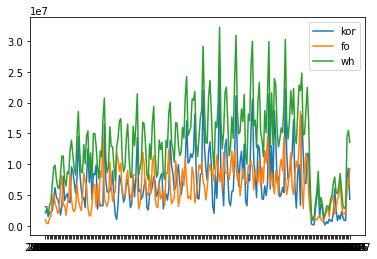

In [ ]:
plt.plot(df_kor['년월'], df_kor['관객수'],label='kor')
plt.plot(df_foreign['년월'], df_foreign['관객수'],label='fo')
plt.plot(df_whole['년월'], df_whole['관객수'],label='wh')

plt.legend()
plt.show()